In [2]:
import requests, numpy as np, pandas as pd
from datetime import date
from pandas import DataFrame
import statsmodels
import time
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
#loading file to pandas dataframe
retail_landing_df = pd.read_excel('Online_Retail.xlsx')

In [4]:
#Creating a new dataframe with only the required columns
q1_quant_data = retail_landing_df[['InvoiceDate','StockCode','Quantity','UnitPrice']]

#Getting the total value of purchase per each item per a invoice number
ser_val = q1_quant_data[['Quantity','UnitPrice']].product(axis=1)
daf = pd.DataFrame(ser_val, index=q1_quant_data.index, columns=['TotalValue'])

#Creating a new dataframe that contains a column with purchase value per item per invoice number
final_quant_data = pd.concat([q1_quant_data,daf], axis=1)
final_quant_data.head()

,InvoiceDate,StockCode,Quantity,UnitPrice,TotalValue
0,2010-12-01 08:26:00,85123A,6,2.55,15.30
1,2010-12-01 08:26:00,71053,6,3.39,20.34
2,2010-12-01 08:26:00,84406B,8,2.75,22.00
3,2010-12-01 08:26:00,84029G,6,3.39,20.34
4,2010-12-01 08:26:00,84029E,6,3.39,20.34


In [5]:
final_quant_data['InvoiceDate']  = final_quant_data['InvoiceDate'] .astype(str)
final_quant_data['Date'] = final_quant_data['InvoiceDate'].str.split(' ').str[0]
final_quant_data['Date'] = pd.to_datetime(final_quant_data['Date'], format = '%Y-%m-%d')
indexed_df = final_quant_data.set_index('Date')
ts = indexed_df['TotalValue']

#Aggregating the sales values by date
sale_by_day = indexed_df.groupby('Date').TotalValue.agg('sum')
sale_by_day.head()

Date
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
Name: TotalValue, dtype: float64

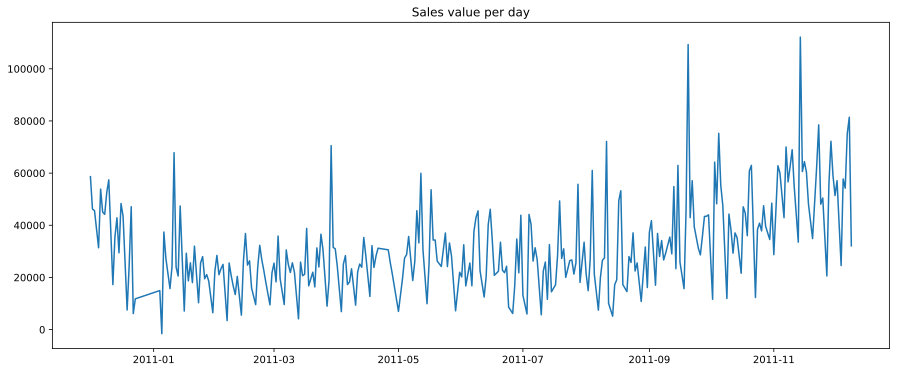

In [12]:
#Plotting sales data per day
plt.plot(sale_by_day.index.to_pydatetime(), sale_by_day.values)
plt.title('Sales value per day')
#plt.savefig("Sales_day.svg")

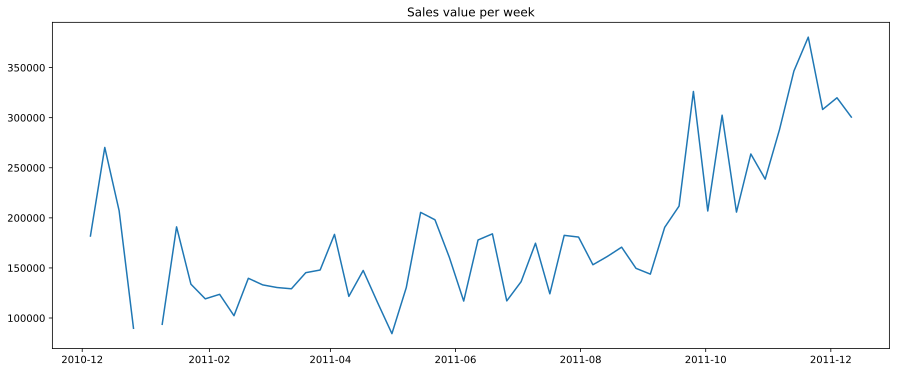

In [13]:
#Aggregating the sales values by week and plotting it
ts_week = sale_by_day.resample('W').sum()
plt.plot(ts_week.index.to_pydatetime(), ts_week.values)
plt.title('Sales value per week')
#plt.savefig("Sales_week.svg")

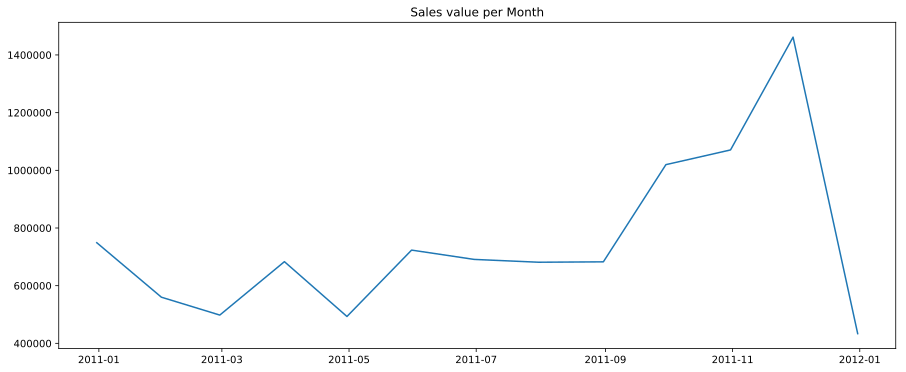

In [14]:
#Aggregating the sales values by month and plotting it
ts_month = sale_by_day.resample('M').sum()
plt.plot(ts_month.index.to_pydatetime(), ts_month.values)
plt.title('Sales value per Month')
#plt.savefig("Sales_month.svg")

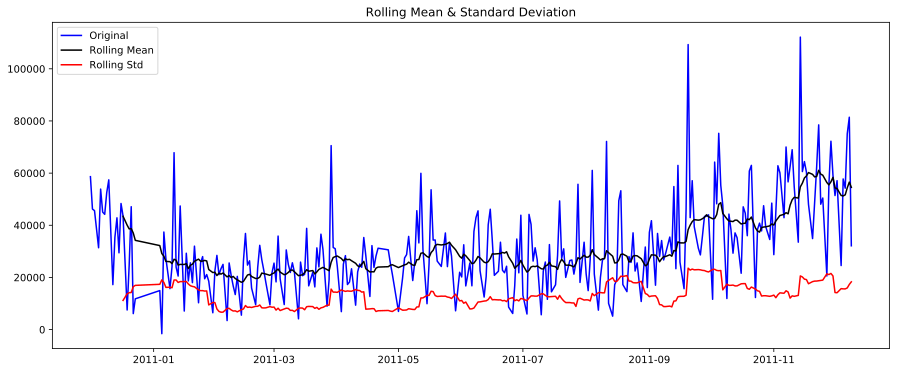

In [23]:
sale_by_day.dropna(inplace=True)
    
#Determing rolling statistics
rolmean = sale_by_day.rolling(window=15,center=False).mean() 
rolstd = sale_by_day.rolling(window=15,center=False).std()

#Plot rolling statistics:
orig = plt.plot(sale_by_day.index.to_pydatetime(), sale_by_day.values, color='blue',label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, color='black', label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
#plt.savefig("Rollingstats.svg")